# Gradient Descent
A gradient is nothing but a derivative that defines the effects on outputs of the function with a little bit of variation in inputs.

Gradient descent is an numerical optimization algoritm which finds local minima of a function.

In [1]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_regression, load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, accuracy_score
import numpy as np
from matplotlib import pyplot as plt, pylab

In [2]:
X, y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1, noise=80, random_state=13)

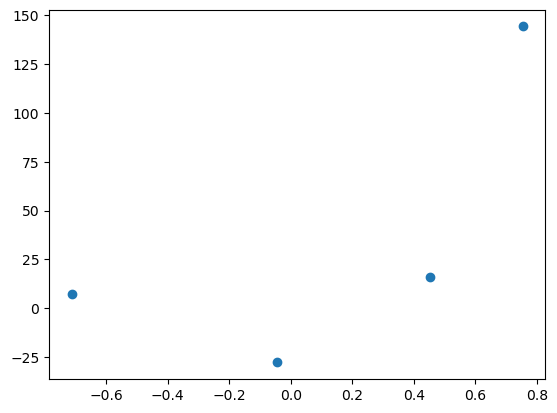

In [3]:
plt.scatter(X, y)

In [4]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [5]:
reg.coef_

array([78.35063668])

In [6]:
reg.intercept_

26.15963284313262

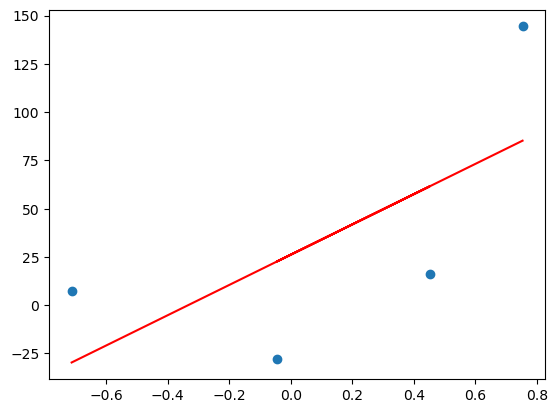

In [7]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="Red")

The above red line denotes the best fit line but this method will fail on higher dimensions, so we will see how to calculate this best line using gradient descent.

In [8]:
y_pred = ((78.35 * X) + 0).reshape(4)

We make the slope constant for now and initiate b at 0.

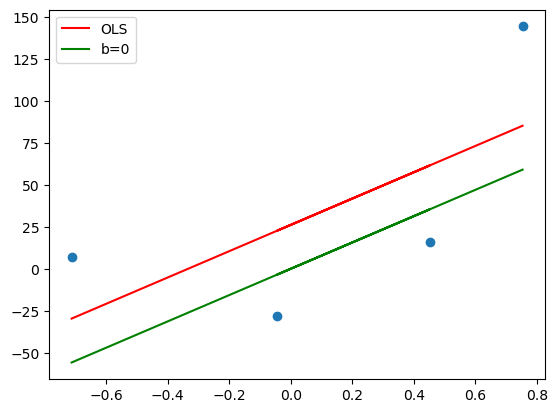

In [9]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="Red", label="OLS")
plt.plot(X, y_pred, color="Green", label="b=0")
plt.legend()
plt.show()

From the above plot we can see the differnece between the two lines. We will now try to minimize the loss.

In [10]:
m = 78.35
b = 0

In [11]:
loss_slope = -2 * np.sum(y - m * X.ravel() - b)
loss_slope

-209.27763408209216

We have calculated a new slope at b = 0. We got this formula from differntiating the loss function of linear regression (We can use the loss function of other algorithms to calculate gradient descent for them).

In [12]:
lr = 0.1
step_size = lr * loss_slope
step_size

-20.927763408209216

We multiply this slope with a learning rate so that change is neither too drastic nor too slow.

In [13]:
b = b - step_size
b

20.927763408209216

In [14]:
y_pred1 = ((78.35 * X) + b).reshape(4)

A new line is created using new value of b we got from subtracting it from old b.

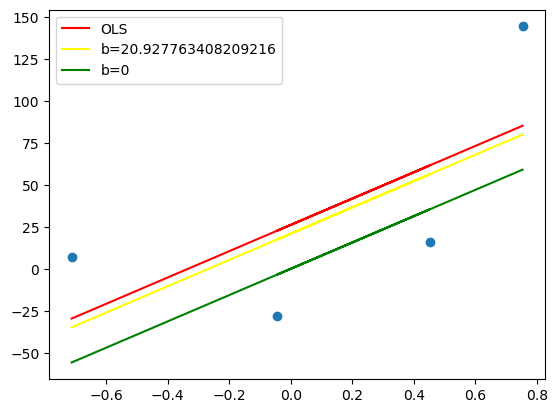

In [15]:
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color="Red", label="OLS")
plt.plot(X, y_pred1, color="Yellow", label=f"b={b}")
plt.plot(X, y_pred, color="Green", label="b=0")
plt.legend()
plt.show()

As we can see from the above plot in the first iteration alone we were able to get closer to best fit line. We then iteratively perform the previous steps until the difference is negligible or we set a fixed iteration time.

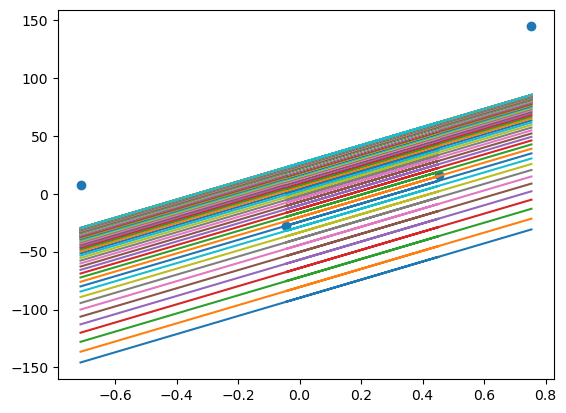

In [16]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

Here we instantiated b at -100 and made slope m constant at 78.35. The learning rate was 0.01 and we performed these steps for 100 epochs.

Lets now redo this with taking the value of both b and m as random.

In [17]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

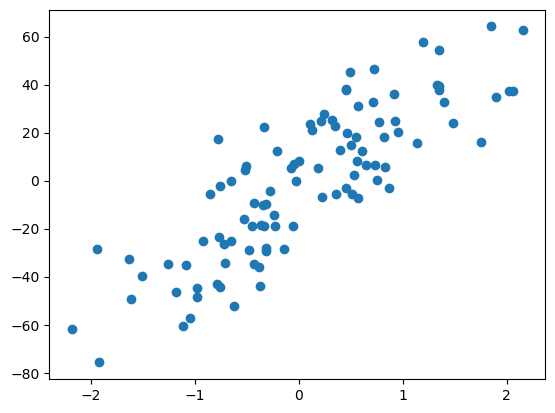

In [18]:
plt.scatter(X, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=33)

In [20]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.coef_)
print(reg.intercept_)

[28.14225619]
-3.555910909662675


In [21]:
y_pred = reg.predict(X_test)
r2_score(y_pred, y_test)

0.630730288434761

In [22]:
class GDRegressor:

    def __init__(self, lr, epochs):
        self.m = 100
        self.b = -120
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        for _ in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())
            self.b -= self.lr * loss_slope_b
            self.m -= self.lr * loss_slope_m

        print(self.m, self.b)

    def predict(self, X):
        return self.m * X + self.b

In [23]:
gd = GDRegressor(0.001, 100)

In [24]:
gd.fit(X_train, y_train)

28.14228152012321 -3.5559169291874713


In [25]:
y_pred = gd.predict(X_test)
r2_score(y_pred, y_test)

0.6307307582949301

Our own method also returns similar slope and intercept with similar r2 score.

# Decision Tree
It is an algorithm which is nothing but a giant if-else checks and it returns a result based on these checks. We use the tree structure to traverse through our decision making process. We first select a feature based on information gained and split the dataset. We then recursively follow these steps for each nodes unless the entropy is 0, then we terminate that node and call it leaf node.

In [26]:
iris = load_iris()
X = iris.data
y = iris.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [28]:
clf = DecisionTreeClassifier(max_depth=4)

Max_depth is a hyper parameter, it represents the maximum number of depth possible.

In [29]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
pred = clf.predict(X_test)

In [31]:
accuracy_score(pred, y_test)

1.0

We will now plot the tree itself to see its logic.

In [32]:
pylab.rcParams["figure.figsize"] = 80, 50

[Text(0.3181818181818182, 0.9, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.22727272727272727, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.2727272727272727, 0.8, 'True  '),
 Text(0.4090909090909091, 0.7, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.36363636363636365, 0.8, '  False'),
 Text(0.18181818181818182, 0.5, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.2727272727272727, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6363636363636364, 0.5, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.45454545454545453, 0.3, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\

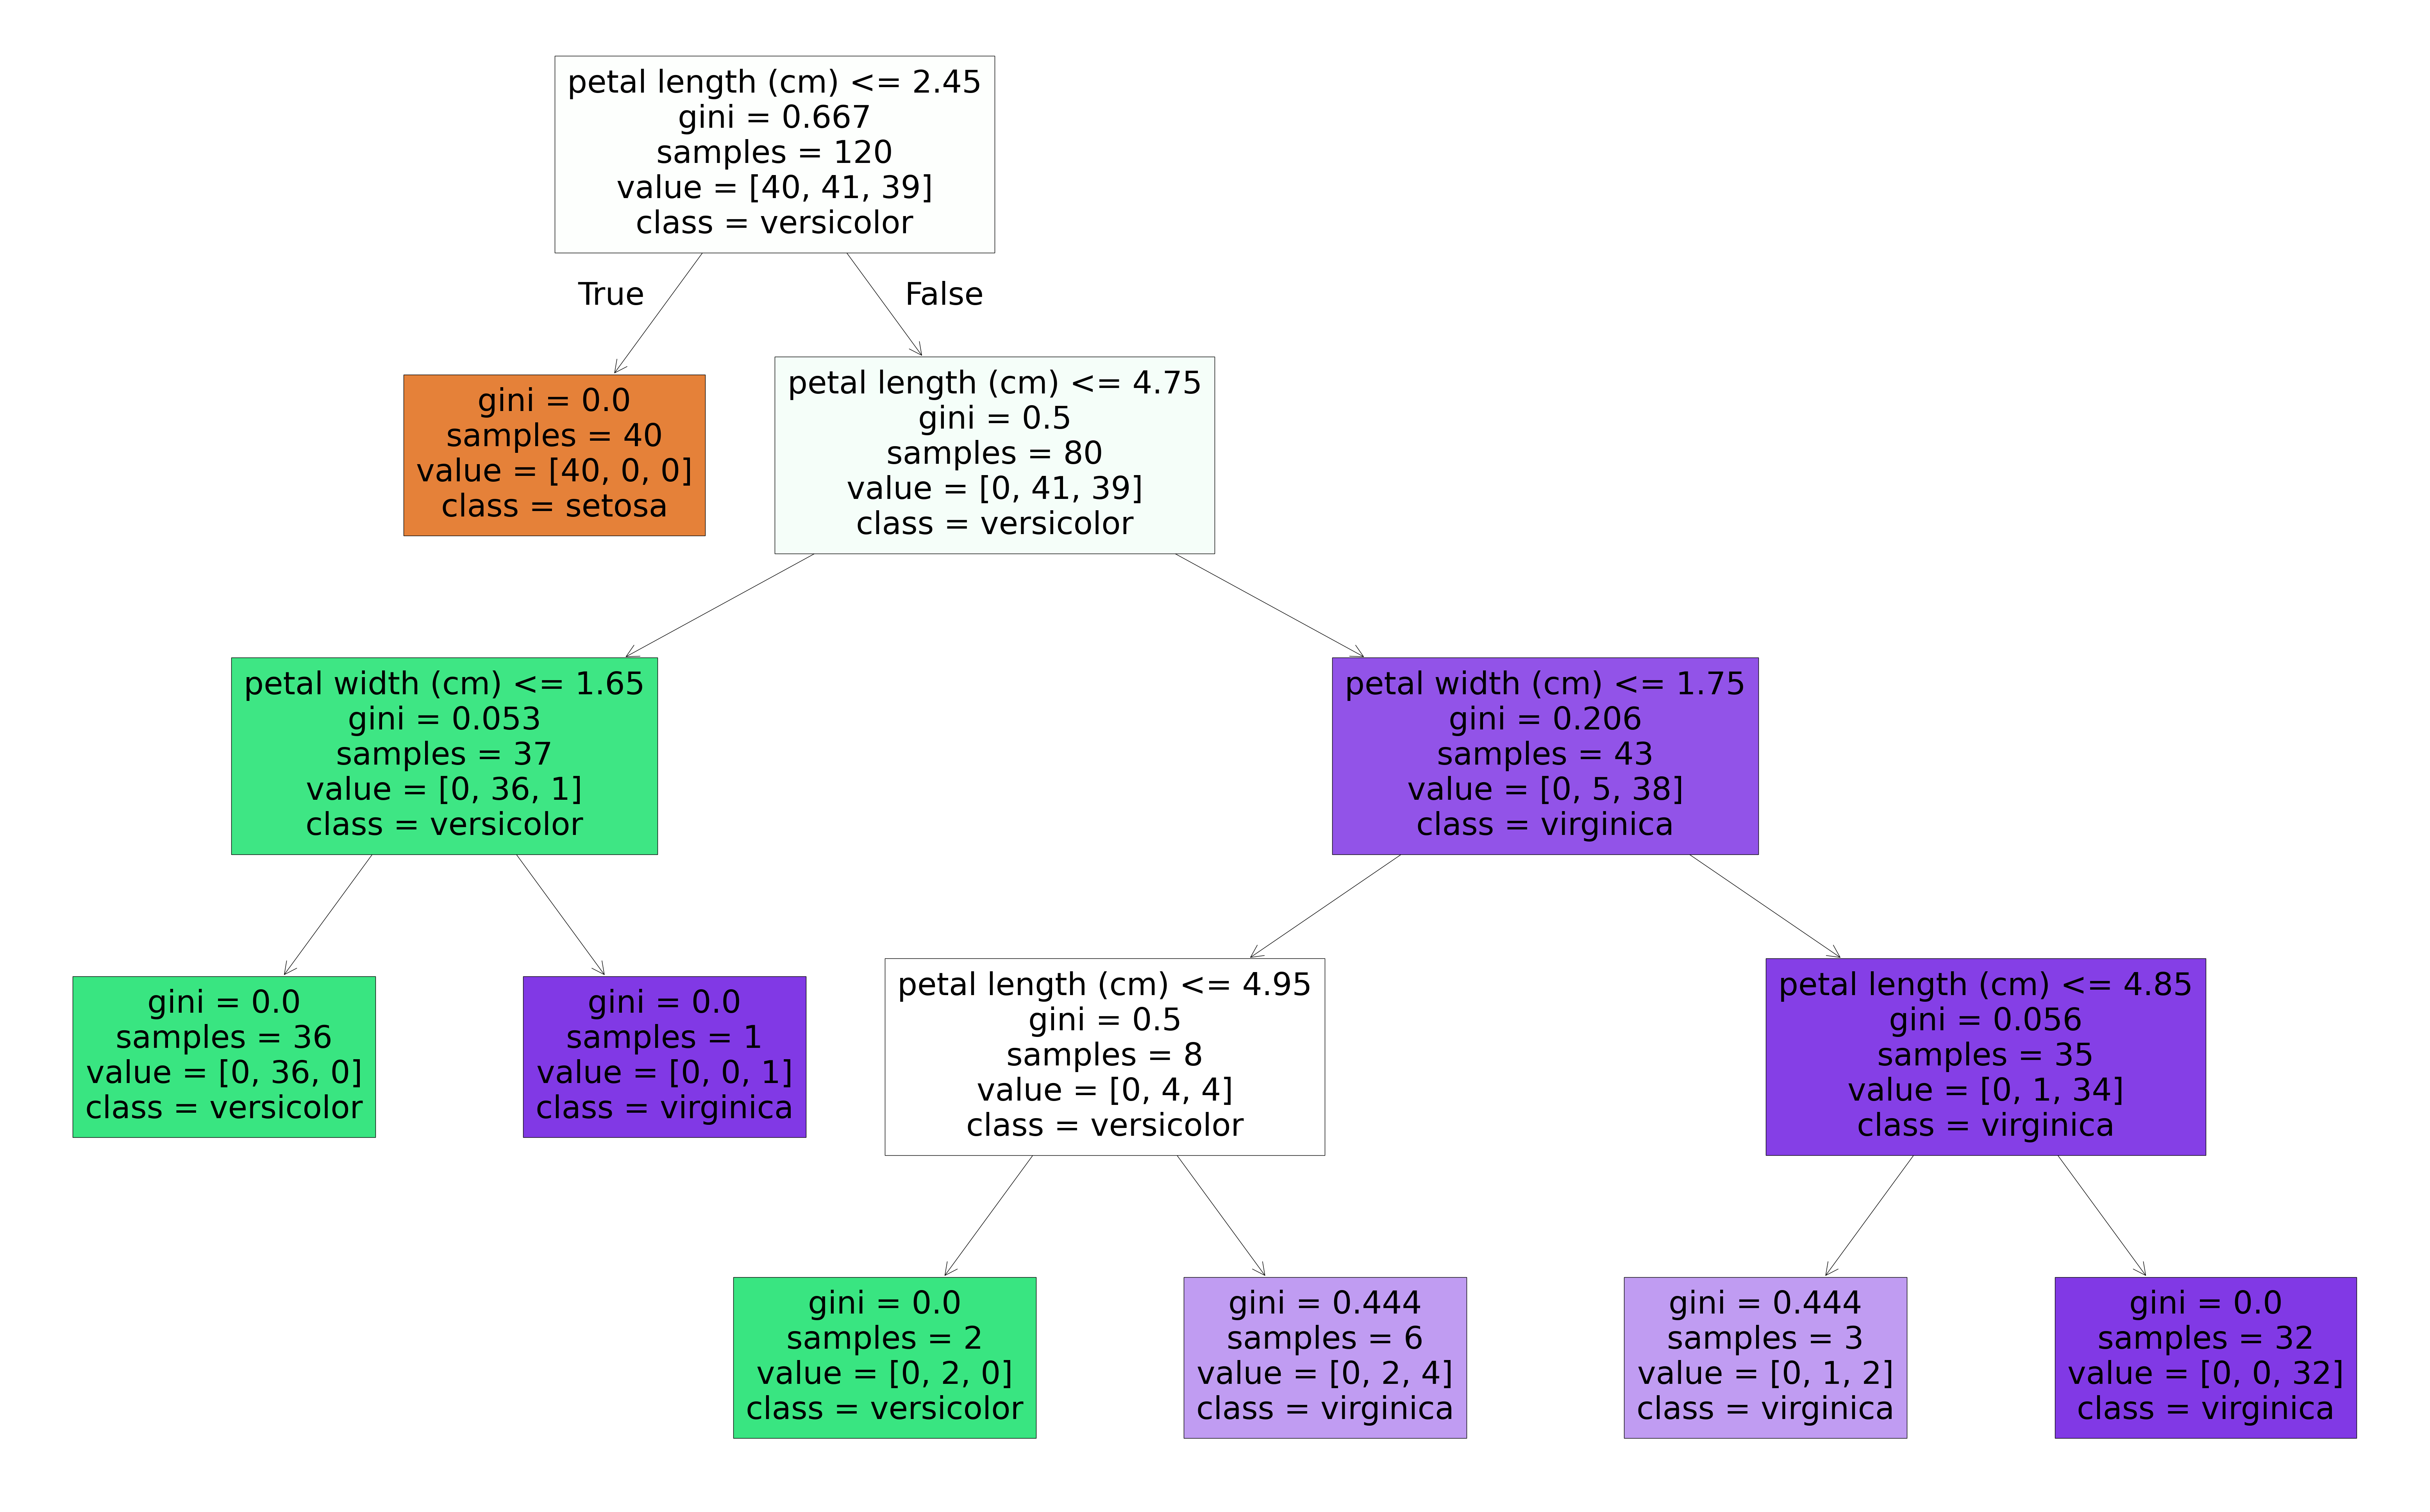

In [33]:
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

The above represents the working of our classifier.